# PROJECT - DATA SCIENTIST SALARIES IN USA

### Made By Berkay TOSUN

 #### To contact me: brky.tsnn@gmail.com

#### To access data-set: https://www.kaggle.com/datasets/nikhilbhathi/data-scientist-salary-us-glassdoor

### What did I research?

#### 1- Which job type earns most?

#### 2- Which type of job has the most jobs?

#### 3- Which job types require which skills most?

#### 4- Which states have much more job opportunities in data field in the USA?

# Import Libraries, Explore Data-Set

In [1]:
#First, let's add the libraries we will use and make some arrangments.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
import re
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go

%matplotlib inline

init_notebook_mode(connected = True)

In [2]:
# Let's read the csv file and check it out.
df = pd.read_csv('data_scientist_salary.csv')

In [3]:
df.head(10)

,index,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,...,tensor,hadoop,tableau,bi,flink,mongo,google_an,job_title_sim,seniority_by_title,Degree
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 - 1000,1973,...,0,0,1,1,0,0,0,data scientist,na,M
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+,1984,...,0,0,0,0,0,0,0,data scientist,na,M
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 - 1000,2010,...,0,0,0,0,0,0,0,data scientist,na,M
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 - 5000,1965,...,0,0,0,0,0,0,0,data scientist,na,na
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 - 200,1998,...,0,0,0,0,0,0,0,data scientist,na,na
5,5,Data Scientist,$71K-$119K (Glassdoor est.),CyrusOne is seeking a talented Data Scientist ...,3.4,CyrusOne\n3.4,"Dallas, TX","Dallas, TX",201 - 500,2000,...,0,0,0,1,0,1,0,data scientist,na,na
6,6,Data Scientist,$54K-$93K (Glassdoor est.),Job Description\n\n**Please only local candida...,4.1,ClearOne Advantage\n4.1,"Baltimore, MD","Baltimore, MD",501 - 1000,2008,...,0,0,0,0,0,0,0,data scientist,na,na
7,7,Data Scientist,$86K-$142K (Glassdoor est.),Advanced Analytics – Lead Data Scientist\nOver...,3.8,Logic20/20\n3.8,"San Jose, CA","Seattle, WA",201 - 500,2005,...,1,0,0,0,0,0,0,data scientist,na,M
8,8,Research Scientist,$38K-$84K (Glassdoor est.),SUMMARY\n\nThe Research Scientist I will be ta...,3.3,Rochester Regional Health\n3.3,"Rochester, NY","Rochester, NY",10000+,2014,...,0,0,0,0,0,0,0,other scientist,na,P
9,9,Data Scientist,$120K-$160K (Glassdoor est.),isn’t your usual company. Our work is powered ...,4.6,<intent>\n4.6,"New York, NY","New York, NY",51 - 200,2009,...,0,0,0,0,0,0,0,data scientist,na,na


In [4]:
#Let's analyze columns and their data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742 entries, 0 to 741
Data columns (total 38 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   index               742 non-null    int64  
 1   Job Title           742 non-null    object 
 2   Salary Estimate     742 non-null    object 
 3   Job Description     742 non-null    object 
 4   Rating              742 non-null    float64
 5   Company Name        742 non-null    object 
 6   Location            742 non-null    object 
 7   Headquarters        742 non-null    object 
 8   Size                742 non-null    object 
 9   Founded             742 non-null    int64  
 10  Type of ownership   742 non-null    object 
 11  Industry            742 non-null    object 
 12  Sector              742 non-null    object 
 13  Revenue             742 non-null    object 
 14  Competitors         742 non-null    object 
 15  Hourly              742 non-null    int64  
 16  Employer

# Data-Cleaning, Creating Columns

In [5]:
#There are some columns that I will not use on this project, so I'm gonna get rid of them.
df = df.drop(columns=['index', 'Rating', 'Headquarters', 'Size', 'Founded',
                      'Type of ownership', 'Industry', 'Sector', 'Revenue', 
                      'Competitors', 'Hourly', 'Employer provided',
                      'company_txt', 'Age'])

In [6]:
#Let's explore how many different job types in data-set and count them one by one.
df.groupby('job_title_sim')['Job Title'].count()

job_title_sim
Data scientist project manager     16
analyst                           101
data analitics                      8
data engineer                     119
data modeler                        5
data scientist                    313
director                            5
machine learning engineer          22
na                                 10
other scientist                   143
Name: Job Title, dtype: int64

In [7]:
#I want to focus on data scientist, data analyst, machine learning engineer and data engineers. So, I will drop others.
df = df[(df['job_title_sim'] != 'director') & 
        (df['job_title_sim'] != 'Data scientist project manager') &
        (df['job_title_sim'] != 'other scientist') &
        (df['job_title_sim'] != 'na') &
        (df['job_title_sim'] != 'data modeler')]

In [8]:
#For better visuals later on, let's change the name of job titles.
df.loc[(df['job_title_sim'] == "analyst") | (df['job_title_sim'] == "data analitics"), "job_title_sim"] = "Data Analyst"
df.loc[df['job_title_sim'] == "data scientist", "job_title_sim"] = "Data Scientist"
df.loc[df['job_title_sim'] == "data engineer", "job_title_sim"] = "Data Engineer"
df.loc[df['job_title_sim'] == "machine learning engineer", "job_title_sim"] = "Machine Learning Engineer"

In [9]:
#To avoid duplicated rows, let's delete them.
df = df.drop_duplicates()

In [10]:
#Be sure that we have only 4 job titles (data scientist, data analyst, machine learning engineer and data engineers).
len(df["job_title_sim"].unique())

4

QUICK NOTE: In the original data-set, we already had minimum, maximum and average values for salary range and also the location codes. But, for extra data cleaning, I deleted them from csv file and created those columns by myself.

In [11]:
#Let's create column for minimum salaries.
def lowest_salary(salary):
    lowest_sal = re.findall(r'\d+', salary)
    return int(lowest_sal[0])

df['Lowest Salary'] = df['Salary Estimate'].apply(lambda salary: lowest_salary(salary))

In [12]:
#Let's create column for maximum salaries.
def highest_salary(salary):
    highest_sal = re.findall(r'\d+', salary)
    return int(highest_sal[1])

df['Highest Salary'] = df['Salary Estimate'].apply(lambda salary: highest_salary(salary))

In [13]:
#Let's create column for average salaries.
df['Average Salary'] = (df['Lowest Salary'] + df['Highest Salary']) / 2

In [14]:
#To avoid error, you need to assign 'None' to variable in below.
pd.options.mode.chained_assignment = None

#Let's create column for job locations.
def loc_code(location):
    splitted_loc = location.split()
    return splitted_loc[len(splitted_loc) - 1]
    
df['Location Code'] = df['Location'].apply(lambda location: loc_code(location))

In [15]:
#Here is the new dataframe.
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 372 entries, 0 to 735
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Job Title           372 non-null    object 
 1   Salary Estimate     372 non-null    object 
 2   Job Description     372 non-null    object 
 3   Company Name        372 non-null    object 
 4   Location            372 non-null    object 
 5   Python              372 non-null    int64  
 6   spark               372 non-null    int64  
 7   aws                 372 non-null    int64  
 8   excel               372 non-null    int64  
 9   sql                 372 non-null    int64  
 10  sas                 372 non-null    int64  
 11  keras               372 non-null    int64  
 12  pytorch             372 non-null    int64  
 13  scikit              372 non-null    int64  
 14  tensor              372 non-null    int64  
 15  hadoop              372 non-null    int64  
 16  tableau 

In [16]:
#Let's see if there is any NaN value in our data-set.
df.isnull().any()

Job Title             False
Salary Estimate       False
Job Description       False
Company Name          False
Location              False
Python                False
spark                 False
aws                   False
excel                 False
sql                   False
sas                   False
keras                 False
pytorch               False
scikit                False
tensor                False
hadoop                False
tableau               False
bi                    False
flink                 False
mongo                 False
google_an             False
job_title_sim         False
seniority_by_title    False
Degree                False
Lowest Salary         False
Highest Salary        False
Average Salary        False
Location Code         False
dtype: bool

# Descriptive Statistics

In [17]:
#Check categorical variables
df.describe(include = object)

,Job Title,Salary Estimate,Job Description,Company Name,Location,job_title_sim,seniority_by_title,Degree,Location Code
count,372,372,372,372,372,372,372,372,372
unique,174,334,368,289,166,4,3,3,34
top,Data Scientist,$86K-$143K (Glassdoor est.),"About Netskope\n\nToday, there's more data and...",PNNL\n3.8,"New York, NY",Data Scientist,na,na,CA
freq,100,4,2,6,36,211,271,209,83


In [18]:
#Check numerical variables
df.describe(include = np.number)

,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an,Lowest Salary,Highest Salary,Average Salary
count,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000
mean,0.663978,0.287634,0.258065,0.537634,0.645161,0.110215,0.051075,0.061828,0.099462,0.126344,0.206989,0.244624,0.096774,0.021505,0.061828,0.021505,77.655914,130.994624,104.325269
std,0.472982,0.453269,0.438159,0.499253,0.479109,0.313579,0.220448,0.241167,0.299685,0.332684,0.405693,0.430443,0.296048,0.145257,0.241167,0.145257,30.495458,44.247649,36.912537
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,16.000000,13.500000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.750000,100.000000,79.375000
50%,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,74.000000,127.000000,100.500000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,93.000000,154.000000,124.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,202.000000,306.000000,254.000000


# Salaries, Number Of Jobs

In [19]:
#Let's find out average salaries for every job title.
avg_salaries = df.groupby('job_title_sim')["Average Salary"].mean()
avg_salaries.sort_values(ascending = False).head(len(df["job_title_sim"].unique()))

job_title_sim
Machine Learning Engineer    128.045455
Data Scientist               116.336493
Data Engineer                102.866667
Data Analyst                  68.513333
Name: Average Salary, dtype: float64

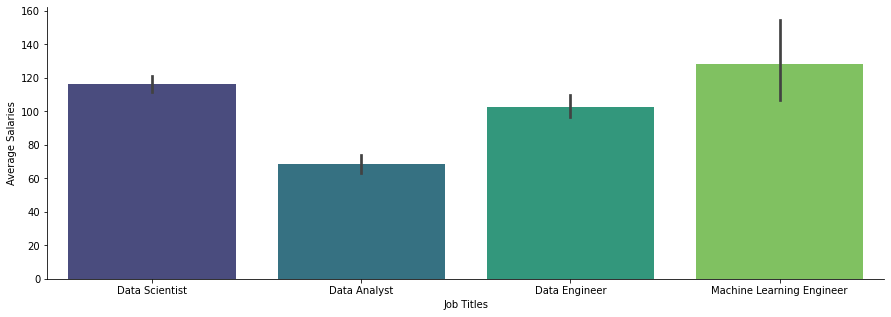

In [20]:
plt.figure(figsize=(15,5))
sns.barplot(x = 'job_title_sim', y = 'Average Salary', data = df, palette = 'viridis')
plt.xlabel("Job Titles")
plt.ylabel("Average Salaries")
sns.despine()

As a result, we can see that machine learning engineers are earning most and data scientist follow them.

In [21]:
#Let's find out number of jobs for every job title.
df['job_title_sim'].value_counts().head()

Data Scientist               211
Data Analyst                  75
Data Engineer                 75
Machine Learning Engineer     11
Name: job_title_sim, dtype: int64

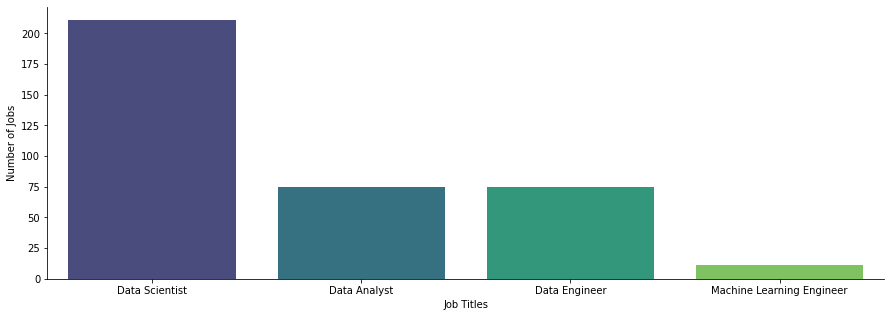

In [22]:
plt.figure(figsize=(15,5))
sns.countplot(x = 'job_title_sim', data = df, palette = 'viridis')
plt.xlabel("Job Titles")
plt.ylabel("Number of Jobs")
sns.despine()

As a result, we can see that there are by far the most data scientists.

Text(0, 0.5, 'Job Titles')

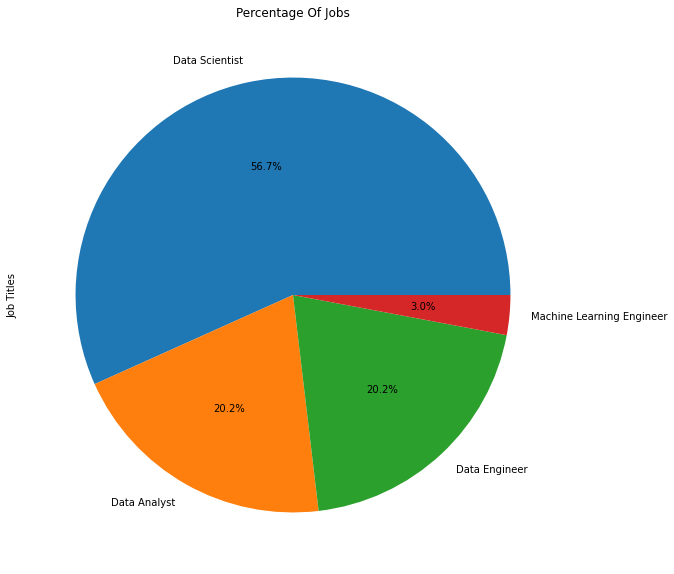

In [23]:
#Let's see the ratios of job types via pie chart.
df['job_title_sim'].value_counts().plot.pie(title = 'Percentage Of Jobs', 
                                                           figsize=(10,10), 
                                                           autopct='%1.1f%%'
                                                          )
plt.ylabel("Job Titles")

# Job Types and Their Skill Requirments

In [24]:
#Let's discover which skills are mostly required for spesific job positions.
#We need to create new dataframe for our matrix plot.
#First, we need to find the ratio of what skills are required for each job type and save them in a 2-d list.
my_skill_list_row = []
my_skill_list_col = []

skill_start_index = 5
skill_end_index = 21

job_titles = pd.unique(df['job_title_sim'])

for job in range(len(job_titles)):
    for col_num in range(skill_start_index, skill_end_index):
        my_skill_list_col.append(df[(df["job_title_sim"] == job_titles[job])].iloc[:,col_num].mean())
    my_skill_list_row.append(my_skill_list_col) 
    my_skill_list_col = []

skill_array = np.array(my_skill_list_row)

In [25]:
#List is ready! Now let's create dataframe and check it out.
skills_df = pd.DataFrame(skill_array, index = job_titles,
                        columns = list(df.columns)[skill_start_index:skill_end_index]
                        )

In [26]:
skills_df

,Python,spark,aws,excel,sql,sas,keras,pytorch,scikit,tensor,hadoop,tableau,bi,flink,mongo,google_an
Data Scientist,0.772512,0.279621,0.232227,0.497630,0.573460,0.161137,0.090047,0.094787,0.156398,0.194313,0.194313,0.246445,0.090047,0.014218,0.061611,0.014218
Data Analyst,0.346667,0.053333,0.106667,0.746667,0.746667,0.080000,0.000000,0.000000,0.000000,0.000000,0.026667,0.400000,0.186667,0.000000,0.026667,0.066667
Data Engineer,0.640000,0.560000,0.466667,0.466667,0.746667,0.013333,0.000000,0.000000,0.000000,0.013333,0.426667,0.120000,0.040000,0.066667,0.106667,0.000000
Machine Learning Engineer,0.909091,0.181818,0.363636,0.363636,0.636364,0.000000,0.000000,0.272727,0.363636,0.454545,0.181818,0.000000,0.000000,0.000000,0.000000,0.000000


<AxesSubplot:>

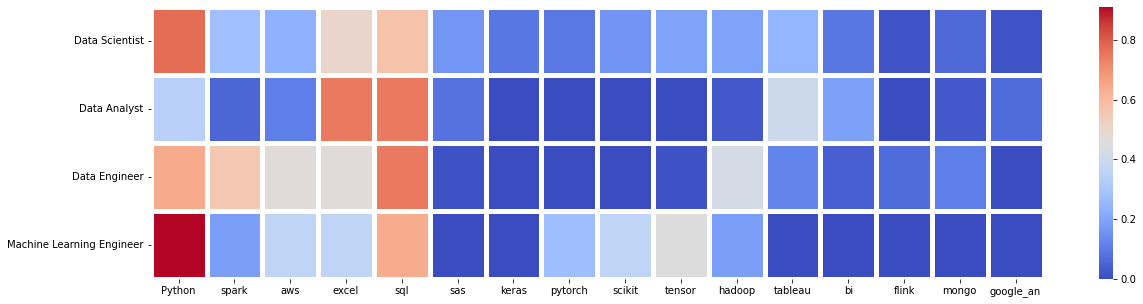

In [27]:
# Here is the heatmap that shows us which skill mostly required for different job positions.
plt.figure(figsize=(20,5))
sns.heatmap(skills_df, cmap = 'coolwarm', linecolor = 'white', linewidths = 5)

Machine Learning Engineer: Python: %90.9, SQL: %63.6, tensor: %45.45 

Data Engineer: SQL: %74.6, Python: %64, spark: %56

Data Analyst: Excel: %74.6, SQL: %74.6, tableau: %40

Data Scientist: Python: %77.2, SQL: %57.3, Excel: %49.7

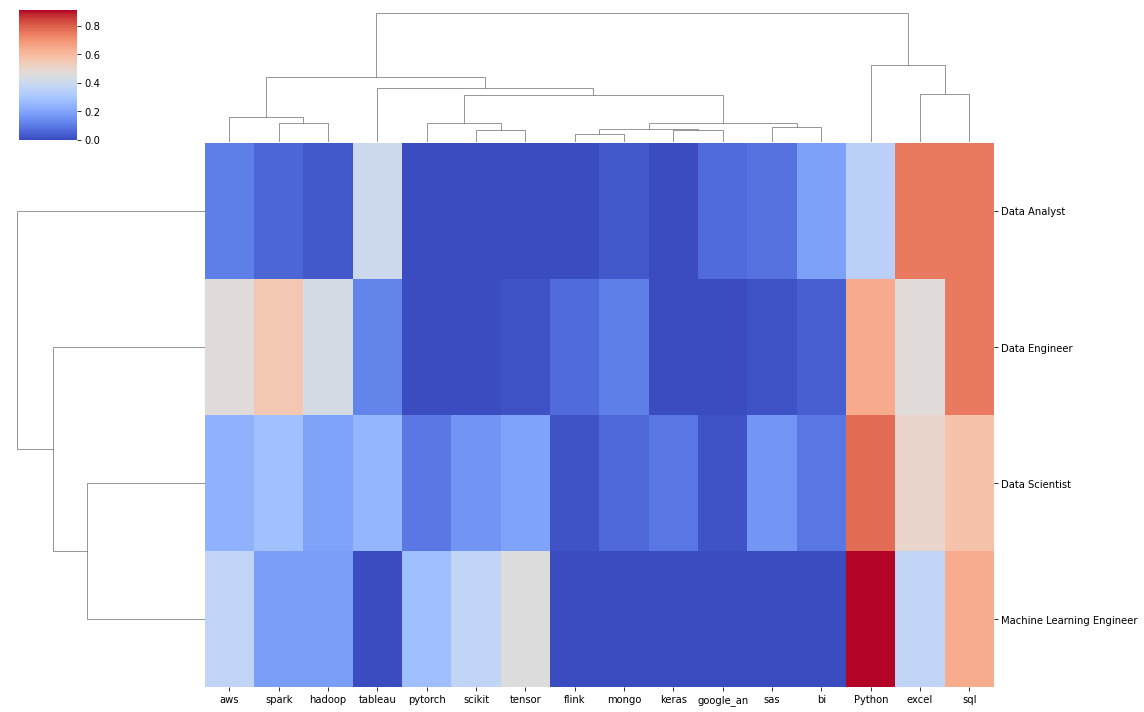

In [28]:
#Here is the clustermap for job types and their skill requirments.
sns.clustermap(skills_df, cmap = 'coolwarm', figsize = (16, 10))

# Map Visualization to Show Job Locations

In [29]:
#Let's start with exploring unique locations and see how many of them.
df.groupby('Location Code')['Location Code'].count()

Location Code
AL     4
AZ     6
CA    83
CO     6
CT     2
DC     9
FL     9
GA     2
IA     3
ID     2
IL    21
IN     6
KS     1
KY     1
LA     2
MA    32
MD    13
MI     3
MN     2
MO     3
NC     6
NJ    11
NM     2
NY    42
OH     7
OR     3
PA    15
RI     1
TN     7
TX    14
UT     6
VA    30
WA    14
WI     4
Name: Location Code, dtype: int64

In [30]:
#We need to assign these location codes and number of jobs in these states to new dataframe.
df_locations = pd.DataFrame({'Number Of Jobs': df.groupby(["Location Code"]).size()}).reset_index()
df_locations.head()

,Location Code,Number Of Jobs
0,AL,4
1,AZ,6
2,CA,83
3,CO,6
4,CT,2


In [31]:
#Let's arrange colors of our map and data information.
map_data = dict(type = 'choropleth',
               locations = df_locations['Location Code'],
               locationmode = 'USA-states',
               z = df_locations['Number Of Jobs'],
               colorscale = 'ylorbr',
               marker = dict(line = dict(color = 'rgb(255,255,255)',width = 2)),
               text = df_locations['Location Code'],
               colorbar = {'title': 'Job Number in State'})

In [32]:
map_layout = dict(title = 'Number of Jobs in Data Field in USA States',
              geo = dict(scope='usa',
                         showlakes = True,
                         lakecolor = 'rgb(85,173,240)')
                 )

In [33]:
choromap = go.Figure(data = [map_data], layout = map_layout)

In [34]:
#Let's draw it! 
#Good thing is that you can interact with the map!
iplot(choromap)

Sometimes if you do not run cell, image isn't showing. So, I put the image of the result below just in case!

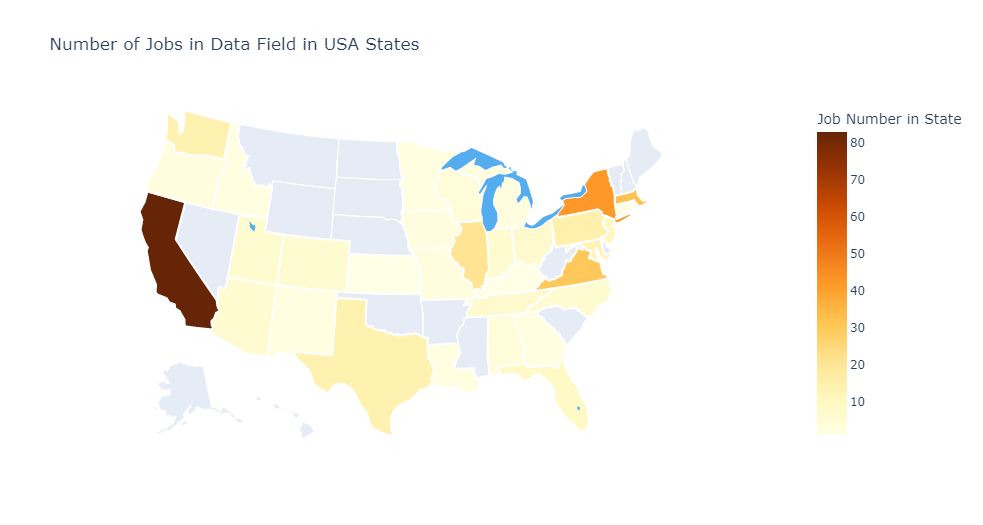